In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Recommendation System\Excel\book (1).csv',encoding='latin-1')
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [64]:
df.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [65]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)
df.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [67]:
# We will now do EDA on this Dataset.

df.groupby('Book.Title')['Book.Rating'].mean().sort_values(ascending=False).head()

Book.Title
Clear Light of Day                                         10.0
Substitute Teaching: A Handbook for Hassle-Free Subbing    10.0
Daughter of Camelot (Merlin's Legacy, No 6)                10.0
The Resourceful English Teacher                            10.0
Das verbotene Lied.                                        10.0
Name: Book.Rating, dtype: float64

In [68]:
df.groupby('Book.Title')['Book.Rating'].count().sort_values(ascending=False).head()

Book.Title
Fahrenheit 451                                     5
Vanished                                           4
Charlie and the Chocolate Factory                  4
Stardust                                           4
The Amber Spyglass (His Dark Materials, Book 3)    4
Name: Book.Rating, dtype: int64

In [69]:
ratings = pd.DataFrame(df.groupby('Book.Title')['Book.Rating'].mean())

In [70]:
ratings

,Book.Rating
Book.Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0
"\Well, there's your problem\: Cartoons",9.0
iI Paradiso Degli Orchi,7.0


In [71]:
ratings['Num of ratings'] = pd.DataFrame(df.groupby('Book.Title')['Book.Rating'].count())


In [72]:
ratings

,Book.Rating,Num of ratings
Book.Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0,1
"\Well, there's your problem\: Cartoons",9.0,1
iI Paradiso Degli Orchi,7.0,1


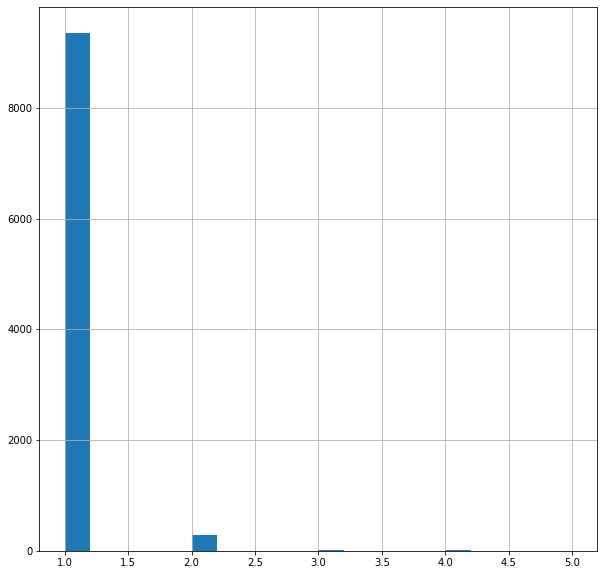

In [73]:
plt.figure(figsize=(10,10))
ratings['Num of ratings'].hist(bins=20)

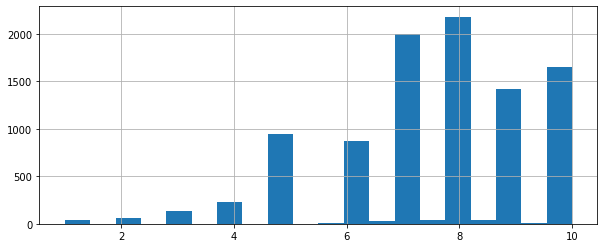

In [74]:
plt.figure(figsize=(10,4))
ratings['Book.Rating'].hist(bins=20)

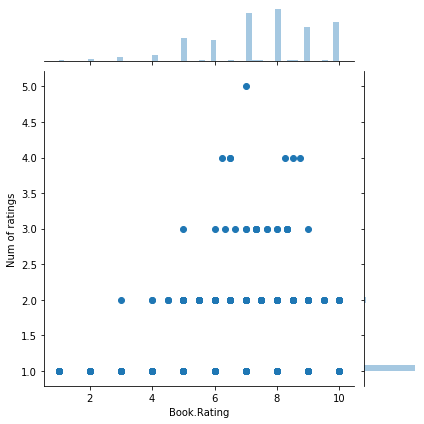

In [75]:
sns.jointplot(x='Book.Rating',y='Num of ratings',data=ratings)

In [76]:
# Recommending similar books

Books_Pivot = pd.pivot_table(index='User.ID',columns='Book.Title',values='Book.Rating',data=df)
Books_Pivot.head()

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
ratings.sort_values('Num of ratings',ascending=False).head()

,Book.Rating,Num of ratings
Book.Title,,
Fahrenheit 451,7.00,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.25,4
Stardust,8.50,4
Vanished,6.50,4
Charlie and the Chocolate Factory,6.50,4


In [78]:
df['Book.Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [79]:
stardust_user_ratings = Books_Pivot['Stardust']
charlie_user_ratings = Books_Pivot['Charlie and the Chocolate Factory']

print(stardust_user_ratings)
print(charlie_user_ratings)


User.ID
8        NaN
9        NaN
10       NaN
12       NaN
14       NaN
          ..
278846   NaN
278849   NaN
278851   NaN
278852   NaN
278854   NaN
Name: Stardust, Length: 2182, dtype: float64
User.ID
8        NaN
9        NaN
10       NaN
12       NaN
14       NaN
          ..
278846   NaN
278849   NaN
278851   NaN
278852   NaN
278854   NaN
Name: Charlie and the Chocolate Factory, Length: 2182, dtype: float64


In [80]:
similar_to_stardust = Books_Pivot.corrwith(stardust_user_ratings)
similar_to_Charlie = Books_Pivot.corrwith(charlie_user_ratings)

C:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [81]:
corr_stardust = pd.DataFrame(similar_to_stardust,columns=['Correlation'])
corr_stardust.dropna(inplace=True)
corr_stardust.head()

,Correlation
Book.Title,
Stardust,1.0


In [82]:
corr_charlie = pd.DataFrame(similar_to_Charlie,columns=['Correlation'])
corr_charlie.dropna(inplace=True)
corr_charlie.head()

,Correlation
Book.Title,
Charlie and the Chocolate Factory,1.0


In [83]:
corr_charlie.sort_values('Correlation',ascending=False)

,Correlation
Book.Title,
Charlie and the Chocolate Factory,1.0


In [84]:
corr_stardust = corr_stardust.join(ratings['Num of ratings'])
corr_stardust.head()

,Correlation,Num of ratings
Book.Title,,
Stardust,1.0,4


In [85]:
corr_stardust[corr_stardust['Num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,Num of ratings
Book.Title,,


In [86]:
# After correlation there is no other Books that correlates with the above books Hence we will change our approach for a better Recommendation.

# We will use the 

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
Tfidf = TfidfVectorizer(stop_words='english')

In [89]:
df['Book.Title'].isnull().sum()

0

In [90]:
# Preparing the Tfidf matrix by fitting and transforming

Tfidf_matrix = Tfidf.fit_transform(df['Book.Title'])
Tfidf_matrix

<10000x11435 sparse matrix of type '<class 'numpy.float64'>'
	with 38044 stored elements in Compressed Sparse Row format>

In [91]:
from sklearn.metrics.pairwise import linear_kernel

In [92]:
# Computing the cosine similarity on Tfidf matrix

cosine_sim_matrix = linear_kernel(Tfidf_matrix,Tfidf_matrix)
cosine_sim_matrix[900]

array([0., 0., 0., ..., 0., 0., 0.])

In [93]:
df_index = pd.Series(df.index,index=df['Book.Title']).drop_duplicates()

In [94]:
df_index.head(40)

Book.Title
Classical Mythology                                                                                                            0
Clara Callan                                                                                                                   1
Decision in Normandy                                                                                                           2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It                             3
The Mummies of Urumchi                                                                                                         4
The Kitchen God's Wife                                                                                                         5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                                                6
PLEADING GUILTY                                                                       

In [95]:
df_index['American Fried: Adventures of a Happy Eater.']

9995

In [106]:
def book_recommendation(Name,topN):
    
    df_id = df_index[Name]
    
    cosine_scores = list(enumerate(cosine_sim_matrix[df_id]))
    
    cosine_scores = sorted(cosine_scores,key= lambda x:x[1],reverse=True)
    
    cosine_scores_10 = cosine_scores[0:topN+1] # Get the scores of top 10 most similar Books
    
    Book_index = [i[0] for i in cosine_scores_10]
    Book_scores = [i[1] for i in cosine_scores_10]
    
    Similar_book = pd.DataFrame(columns=['Book.Title','Score']) # Similar books and scores
    Similar_book['Book.Title'] = df.loc[Book_index,'Book.Title']
    Similar_book['Score'] = Book_scores
    Similar_book.reset_index(inplace=True)  
    Similar_book.drop(["index"],axis=1,inplace=True)
    print (Similar_book)

    

In [120]:
book_recommendation("Peter Pan: The Original Story (Peter Pan)",topN=5)

                                          Book.Title     Score
0          Peter Pan: The Original Story (Peter Pan)  1.000000
1                     Peter Pan (Little Golden Book)  0.696735
2                       Peter Pan (Heirloom Classic)  0.637925
3                                  The Great God Pan  0.481992
4                                 Peter and Veronica  0.363278
5  LA Piramide De Peter, O Lo Acabaremos Entendie...  0.324215


In [114]:
book_recommendation("Pretend You Don't See Her",topN=5)

                                      Book.Title     Score
0                      Pretend You Don't See Her  1.000000
1                                   The Last Don  0.588180
2  Ni Vue, Ni Connue / Pretend You Don't See Her  0.445291
3                                 Death of a Don  0.436315
4               Don't You Know There's a War On?  0.348793
5                    Don't Fall Off the Mountain  0.324795
